Copyright @ cb_park@korea.ac.kr (Cheonbok Park), joonleesky@kaist.ac.kr (Hojoon Lee)

## Convolutional Neural Network

In [29]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as datasets
import torchvision.transforms as transforms

## Below are the all identical neural network with different expression

In [30]:
class CNN1(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN1, self).__init__()
        
        self.conv = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2)

    def forward(self, x):
        out = self.conv(x)
        out = self.relu(out)
        out = self.maxpool(out)
        return out  # input image = batch_size x 3 x 16 x 16

    
class CNN2(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN2, self).__init__()

        self.layer = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2))

    def forward(self, x):
        out = self.layer(x)
        return out  # input image = batch_size x 3 x 16 x 16      
      

class CNN3(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN3, self).__init__()
        layer = []
        
        layer.append(nn.Conv2d(3, 64, kernel_size=3, padding=1))
        layer.append(nn.ReLU())
        layer.append(nn.MaxPool2d(2))
        
        self.layer = nn.Sequential(*layer)

    def forward(self, x):
        out = self.layer(x)
        return out  # input image = batch_size x 3 x 16 x 16

In [31]:
sample_image = Variable(torch.zeros(64, 3, 32, 32))

In [32]:
cnn = CNN1()
print(cnn)
output = cnn(sample_image)
print(output.size())

CNN1(
  (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
torch.Size([64, 64, 16, 16])


In [33]:
cnn = CNN2()
print(cnn)
output = cnn(sample_image)
print(output.size())

CNN2(
  (layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)
torch.Size([64, 64, 16, 16])


In [34]:
cnn = CNN3()
print(cnn)
output = cnn(sample_image)
print(output.size())

CNN3(
  (layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
)
torch.Size([64, 64, 16, 16])


### Let's practice creating the Convolutional Neural Network

In [35]:
class CNN_prac(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN_prac, self).__init__()
        self.conv1 = nn.Conv2d(3, 512, 3, 1, 1) 
        self.conv2 = nn.Conv2d(512, 256, 3, 1, 1) 
        self.conv3 = nn.Conv2d(256, 256, 3, 2, 1) 
        self.conv4 = nn.Conv2d(256, 256, 3, 4, 1)

        self.linear = nn.Linear(256*4*4, 10)
    def forward(self, x):
        out=self.conv1(x)
        out=self.conv2(out)
        out=self.conv3(out)
        out=self.conv4(out)
        out = out.contiguous().view(-1, 256*4*4)
        out = self.linear(out)
        return out

In [36]:
cnn_prac=CNN_prac()
sample_image = Variable(torch.zeros(64, 3, 32, 32))
output=cnn_prac(sample_image)
print(output.size()) 
print(cnn_prac)

torch.Size([64, 10])
CNN_prac(
  (conv1): Conv2d(3, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv4): Conv2d(256, 256, kernel_size=(3, 3), stride=(4, 4), padding=(1, 1))
  (linear): Linear(in_features=4096, out_features=10, bias=True)
)


## 2.1 VGG-19

![VGG](./imgs/vggnet.jpg)

### Let's create by yourself

In [37]:
class ConvBlock1(nn.Module):

    def __init__(self, in_dim, out_dim):
        super(ConvBlock1, self).__init__()
        
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.main = nn.Sequential(nn.Conv2d(self.in_dim, self.out_dim, kernel_size=3, padding=1),             
                                  nn.LeakyReLU(0.2),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),
                                  nn.LeakyReLU(0.2),
                                  nn.MaxPool2d(2,2)
                                 )
        
    def forward(self, x):
        out = self.main(x)
        return out

In [38]:
class ConvBlock2(nn.Module):

    def __init__(self, in_dim, out_dim):
        super(ConvBlock2, self).__init__()
        
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.main = nn.Sequential(nn.Conv2d(self.in_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.LeakyReLU(0.2),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),
                                  nn.LeakyReLU(0.2),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),
                                  nn.LeakyReLU(0.2),
                                  nn.MaxPool2d(2,2)
                                 )
        
    def forward(self, x):
        out = self.main(x)
        return out

In [39]:
class VGG19(nn.Module):
  
    def __init__(self):
        super(VGG19, self).__init__()
        
        self.convlayer1 = ConvBlock1(3, 64)
        self.convlayer2 = ConvBlock1(64, 128)
        self.convlayer3 = ConvBlock2(128, 256)
        self.convlayer4 = ConvBlock2(256, 512)
        self.convlayer5 = ConvBlock2(512, 512)
        self.linear = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )
    def forward(self, input):
        out = self.convlayer1(input)    
        out = self.convlayer2(out)
        out = self.convlayer3(out)
        out = self.convlayer4(out)
        out = self.convlayer5(out).squeeze() # 16 x 512 x 1 x 1에서 뒤 1 x 1 축약 
        out = self.linear(out)
        return out


## Test Your Impelemetation

In [40]:
vgg19 = VGG19()
print(vgg19)

output = vgg19(sample_image)
print(output.size())

VGG19(
  (convlayer1): ConvBlock1(
    (main): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): LeakyReLU(negative_slope=0.2)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (convlayer2): ConvBlock1(
    (main): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): LeakyReLU(negative_slope=0.2)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (convlayer3): ConvBlock2(
    (main): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): LeakyReLU(negative_slope=0.2)
      (2): Conv2d(256, 256, kernel_size=(3, 3), str

In [41]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
if count_parameters(vgg19) == 20365002:
    print('success!')

# 2.2 CIFAR-10 Dataset

50000 training images  \
10000 validation images \
\
10 classes = [airplane, car, truck, frog, ...]
\
for more info, https://www.cs.toronto.edu/~kriz/cifar.html 



In [42]:
# set hyperparameters
batch_size = 64
learning_rate = 0.0001
num_epochs = 4

In [43]:
# import torchvision.datasets as datasets

train_dataset = datasets.CIFAR10(root='./data/',       # 50000장
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = datasets.CIFAR10(root='./data/',        # 10000장
                           train=False, 
                           transform=transforms.ToTensor())

# 데이터 로더
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=True)

Files already downloaded and verified


In [44]:
import matplotlib.pyplot as plt
import numpy as np


def show_cifar10():
    for images, _ in train_loader:
        plt.figure(figsize=(8,8))
        images_to_show = images.numpy().transpose((0,2,3,1))

        for a in range(331, 340):  
            plt.subplot(a)
            plt.imshow(images_to_show[a-331])
            plt.xticks([])
            plt.yticks([])    
            plt.show()   
        break
    return 0


def loss_plot(acc):  
    plt.plot(acc)
    plt.xlabel('log')
    plt.ylabel('accuracy')
    plt.grid(True)
    plt.show()
    return 0

import time
class Timer():    
    def __init__(self):
        self.cur_t = time.time()

    def tic(self):
        self.cur_t = time.time()

    def toc(self):
        return time.time() - self.cur_t

    def tocStr(self, t=-1):
        if (t == -1):
            return str(datetime.timedelta(seconds=np.round(time.time() - self.cur_t, 3)))[:-4]
        else:
            return str(datetime.timedelta(seconds=np.round(t, 3)))[:-4]
          

def test_on_cifar10(model, accuracy_list):  
    # Test the Model       
    model.eval()    # Change model to 'eval' mode (BN uses moving mean/var).
    correct = 0
    total = 0
    for j, (images, labels) in enumerate(test_loader):
        images = Variable(images).cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum()
        if (j+1)%100==0:
            break

    print('Test Accuracy of the model on the 100 test images: %d %%' % (100 * correct.float() / total))
    accuracy_list.append(100 * correct.float() / total) 
    return accuracy_list

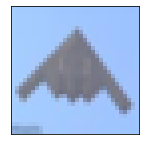

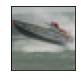

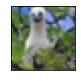

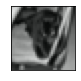

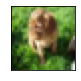

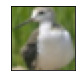

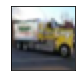

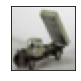

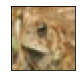

0

In [45]:
show_cifar10()

## Train Cifar-10 with your VGG-19

Epoch [1/4], Iter [100/781] Loss: 1.9859, iter_time: 20.84
Test Accuracy of the model on the 100 test images: 24 %
Epoch [1/4], Iter [200/781] Loss: 1.6459, iter_time: 26.01
Test Accuracy of the model on the 100 test images: 30 %
Epoch [1/4], Iter [300/781] Loss: 1.9601, iter_time: 26.18
Test Accuracy of the model on the 100 test images: 32 %
Epoch [1/4], Iter [400/781] Loss: 1.6890, iter_time: 26.20
Test Accuracy of the model on the 100 test images: 33 %
Epoch [1/4], Iter [500/781] Loss: 1.4408, iter_time: 26.25
Test Accuracy of the model on the 100 test images: 44 %
Epoch [1/4], Iter [600/781] Loss: 1.4126, iter_time: 26.27
Test Accuracy of the model on the 100 test images: 47 %
Epoch [1/4], Iter [700/781] Loss: 1.5102, iter_time: 26.27
Test Accuracy of the model on the 100 test images: 48 %


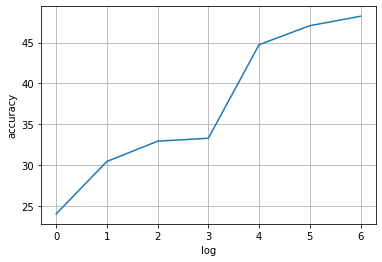

Epoch [2/4], Iter [100/781] Loss: 1.3856, iter_time: 43.75
Test Accuracy of the model on the 100 test images: 51 %
Epoch [2/4], Iter [200/781] Loss: 1.3239, iter_time: 26.33
Test Accuracy of the model on the 100 test images: 50 %
Epoch [2/4], Iter [300/781] Loss: 1.3748, iter_time: 26.31
Test Accuracy of the model on the 100 test images: 51 %
Epoch [2/4], Iter [400/781] Loss: 1.3975, iter_time: 26.28
Test Accuracy of the model on the 100 test images: 51 %
Epoch [2/4], Iter [500/781] Loss: 1.1076, iter_time: 26.29
Test Accuracy of the model on the 100 test images: 52 %
Epoch [2/4], Iter [600/781] Loss: 0.9764, iter_time: 26.34
Test Accuracy of the model on the 100 test images: 56 %
Epoch [2/4], Iter [700/781] Loss: 1.0301, iter_time: 26.28
Test Accuracy of the model on the 100 test images: 58 %


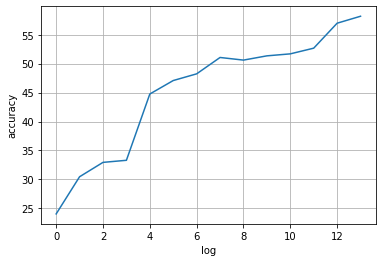

Epoch [3/4], Iter [100/781] Loss: 1.3425, iter_time: 43.70
Test Accuracy of the model on the 100 test images: 59 %
Epoch [3/4], Iter [200/781] Loss: 1.1470, iter_time: 26.26
Test Accuracy of the model on the 100 test images: 60 %
Epoch [3/4], Iter [300/781] Loss: 0.9637, iter_time: 26.21
Test Accuracy of the model on the 100 test images: 62 %
Epoch [3/4], Iter [400/781] Loss: 1.1124, iter_time: 26.29
Test Accuracy of the model on the 100 test images: 60 %
Epoch [3/4], Iter [500/781] Loss: 1.0717, iter_time: 26.24
Test Accuracy of the model on the 100 test images: 63 %
Epoch [3/4], Iter [600/781] Loss: 1.1518, iter_time: 26.31
Test Accuracy of the model on the 100 test images: 63 %
Epoch [3/4], Iter [700/781] Loss: 0.7480, iter_time: 26.29
Test Accuracy of the model on the 100 test images: 62 %


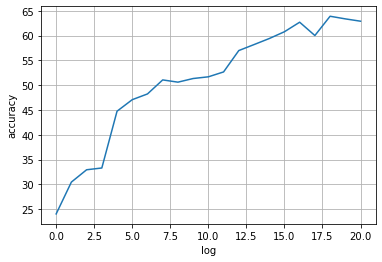

Epoch [4/4], Iter [100/781] Loss: 1.0381, iter_time: 43.84
Test Accuracy of the model on the 100 test images: 64 %
Epoch [4/4], Iter [200/781] Loss: 1.2816, iter_time: 26.28
Test Accuracy of the model on the 100 test images: 63 %
Epoch [4/4], Iter [300/781] Loss: 0.9248, iter_time: 26.31
Test Accuracy of the model on the 100 test images: 65 %
Epoch [4/4], Iter [400/781] Loss: 0.9072, iter_time: 26.34
Test Accuracy of the model on the 100 test images: 65 %
Epoch [4/4], Iter [500/781] Loss: 0.9268, iter_time: 26.38
Test Accuracy of the model on the 100 test images: 64 %
Epoch [4/4], Iter [600/781] Loss: 0.8224, iter_time: 26.34
Test Accuracy of the model on the 100 test images: 67 %
Epoch [4/4], Iter [700/781] Loss: 0.8584, iter_time: 26.38
Test Accuracy of the model on the 100 test images: 68 %


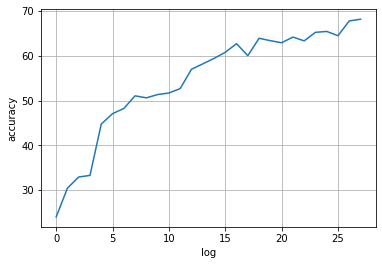

In [46]:
import torchvision.models as models
vgg19 = models.vgg19_bn(pretrained=False)

tell_time = Timer()
iter_time = 0

vgg19 = vgg19.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg19.parameters(), lr=learning_rate)

accuracy_list = []
for epoch in range(num_epochs):
    vgg19.train()
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images).cuda()
        labels = Variable(labels).cuda()

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = vgg19(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f, iter_time: %2.2f' 
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item(), tell_time.toc()-iter_time))
            iter_time = tell_time.toc()    
            accuracy_list = test_on_cifar10(vgg19, accuracy_list)

    loss_plot(accuracy_list)

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
accuracy_list = []
y_test = []
y_pred = []
with torch.no_grad():
    vgg19.eval()
    for i, (images, labels) in enumerate(test_loader):
        images = Variable(images).cuda()
        labels = Variable(labels).cuda()
        
        y_test.extend(labels.long().detach().cpu().numpy())

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = vgg19(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.long().detach().cpu().numpy())
        
        loss = criterion(outputs, labels)

        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f, iter_time: %2.2f' 
                 %(epoch+1, num_epochs, i+1, len(test_dataset)//batch_size, loss.item(), tell_time.toc()-iter_time))
            iter_time = tell_time.toc()    
            accuracy_list = test_on_cifar10(vgg19, accuracy_list)

Epoch [4/4], Iter [100/156] Loss: 0.9813, iter_time: 28.67
Test Accuracy of the model on the 100 test images: 69 %


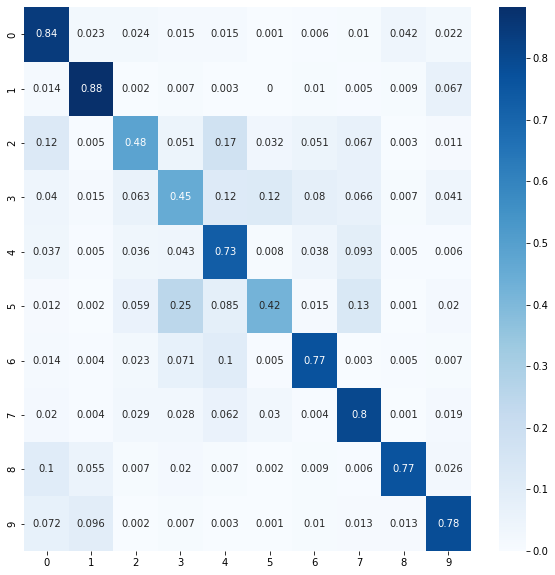

In [49]:
cf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
        
plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.show()

## Train Cifar-10 with pre-trained VGG-19

In [50]:
import torchvision.models as models
pre_vgg=models.vgg19_bn(pretrained=True)

In [51]:
class pretrained_vgg(nn.Module):
    def __init__(self, pre_vgg):
        super(pretrained_vgg, self).__init__()
        self.features = nn.Sequential(   
            *list(pre_vgg.features.children())
        )
        self.linear = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )
    def forward(self, x):
        out = self.features(x).squeeze()
        out = self.linear(out)
        return out

Epoch [1/4], Iter [100/781] Loss: 1.2728, iter_time: 10.34
Test Accuracy of the model on the 100 test images: 65 %
Epoch [1/4], Iter [200/781] Loss: 1.0942, iter_time: 14.37
Test Accuracy of the model on the 100 test images: 75 %
Epoch [1/4], Iter [300/781] Loss: 0.6028, iter_time: 14.35
Test Accuracy of the model on the 100 test images: 78 %
Epoch [1/4], Iter [400/781] Loss: 0.5692, iter_time: 14.26
Test Accuracy of the model on the 100 test images: 81 %
Epoch [1/4], Iter [500/781] Loss: 0.5832, iter_time: 14.23
Test Accuracy of the model on the 100 test images: 81 %
Epoch [1/4], Iter [600/781] Loss: 0.4647, iter_time: 14.26
Test Accuracy of the model on the 100 test images: 82 %
Epoch [1/4], Iter [700/781] Loss: 0.3938, iter_time: 14.25
Test Accuracy of the model on the 100 test images: 84 %


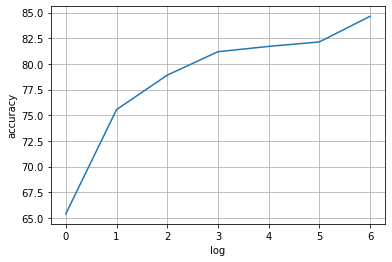

Epoch [2/4], Iter [100/781] Loss: 0.2778, iter_time: 23.00
Test Accuracy of the model on the 100 test images: 85 %
Epoch [2/4], Iter [200/781] Loss: 0.5558, iter_time: 14.44
Test Accuracy of the model on the 100 test images: 85 %
Epoch [2/4], Iter [300/781] Loss: 0.2242, iter_time: 14.34
Test Accuracy of the model on the 100 test images: 84 %
Epoch [2/4], Iter [400/781] Loss: 0.6153, iter_time: 14.28
Test Accuracy of the model on the 100 test images: 82 %
Epoch [2/4], Iter [500/781] Loss: 0.5034, iter_time: 14.36
Test Accuracy of the model on the 100 test images: 83 %
Epoch [2/4], Iter [600/781] Loss: 0.3262, iter_time: 14.24
Test Accuracy of the model on the 100 test images: 85 %
Epoch [2/4], Iter [700/781] Loss: 0.4477, iter_time: 14.29
Test Accuracy of the model on the 100 test images: 83 %


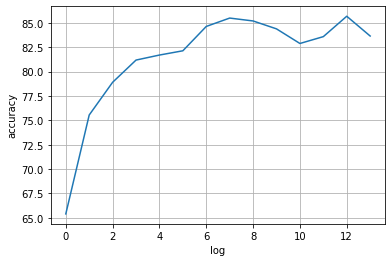

Epoch [3/4], Iter [100/781] Loss: 0.2642, iter_time: 23.02
Test Accuracy of the model on the 100 test images: 87 %
Epoch [3/4], Iter [200/781] Loss: 0.3688, iter_time: 14.37
Test Accuracy of the model on the 100 test images: 84 %
Epoch [3/4], Iter [300/781] Loss: 0.2270, iter_time: 14.39
Test Accuracy of the model on the 100 test images: 87 %
Epoch [3/4], Iter [400/781] Loss: 0.1589, iter_time: 14.46
Test Accuracy of the model on the 100 test images: 86 %
Epoch [3/4], Iter [500/781] Loss: 0.3534, iter_time: 14.54
Test Accuracy of the model on the 100 test images: 86 %
Epoch [3/4], Iter [600/781] Loss: 0.1711, iter_time: 14.56
Test Accuracy of the model on the 100 test images: 86 %
Epoch [3/4], Iter [700/781] Loss: 0.1442, iter_time: 14.46
Test Accuracy of the model on the 100 test images: 85 %


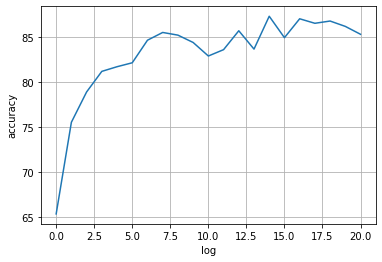

Epoch [4/4], Iter [100/781] Loss: 0.0856, iter_time: 23.49
Test Accuracy of the model on the 100 test images: 88 %
Epoch [4/4], Iter [200/781] Loss: 0.1398, iter_time: 14.58
Test Accuracy of the model on the 100 test images: 84 %
Epoch [4/4], Iter [300/781] Loss: 0.0776, iter_time: 14.43
Test Accuracy of the model on the 100 test images: 87 %
Epoch [4/4], Iter [400/781] Loss: 0.1209, iter_time: 14.47
Test Accuracy of the model on the 100 test images: 86 %
Epoch [4/4], Iter [500/781] Loss: 0.0679, iter_time: 14.31
Test Accuracy of the model on the 100 test images: 86 %
Epoch [4/4], Iter [600/781] Loss: 0.2123, iter_time: 14.23
Test Accuracy of the model on the 100 test images: 87 %
Epoch [4/4], Iter [700/781] Loss: 0.1475, iter_time: 14.34
Test Accuracy of the model on the 100 test images: 86 %


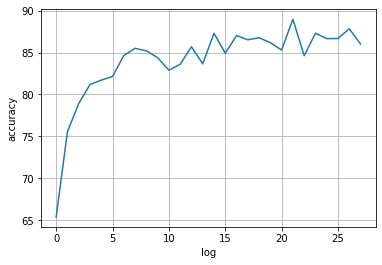

In [52]:
vgg19 = pretrained_vgg(pre_vgg)

tell_time = Timer()
iter_time = 0

vgg19 = vgg19.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg19.parameters(), lr=learning_rate)

accuracy_list = []
for epoch in range(num_epochs):
    vgg19.train()
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images).cuda()
        labels = Variable(labels).cuda()

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = vgg19(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f, iter_time: %2.2f' 
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item(), tell_time.toc()-iter_time))
            iter_time = tell_time.toc()    
            accuracy_list = test_on_cifar10(vgg19, accuracy_list)

    loss_plot(accuracy_list)

In [53]:
accuracy_list = []
y_test = []
y_pred = []
with torch.no_grad():
    vgg19.eval()
    for i, (images, labels) in enumerate(test_loader):
        images = Variable(images).cuda()
        labels = Variable(labels).cuda()
        
        y_test.extend(labels.long().detach().cpu().numpy())

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = vgg19(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.long().detach().cpu().numpy())
        
        loss = criterion(outputs, labels)

        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f, iter_time: %2.2f' 
                 %(epoch+1, num_epochs, i+1, len(test_dataset)//batch_size, loss.item(), tell_time.toc()-iter_time))
            iter_time = tell_time.toc()    
            accuracy_list = test_on_cifar10(vgg19, accuracy_list)

Epoch [4/4], Iter [100/156] Loss: 0.3428, iter_time: 16.89
Test Accuracy of the model on the 100 test images: 87 %


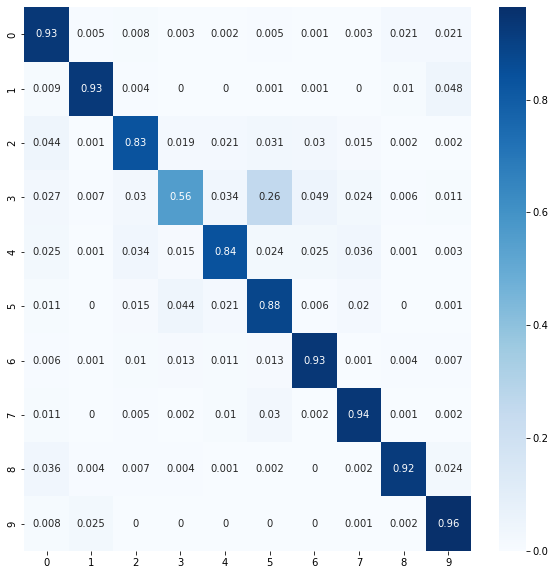

In [54]:
cf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
        
plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.show()